# Data Load

In previous notebook, we already saved the `df_to_number` function to change the data into numerical representations. Also, in popularity predictions, we don't need `genre`, `artist_name`, `track_name`, and `track_id` so we can drop them as well. 

In [35]:
from script import preprocessing as pre
import pandas as pd 
data = pre.df_to_number(pd.read_csv('data/SpotifyFeatures.csv').drop(columns=['artist_name', 'track_name', 'track_id', 'genre']))
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


# Data Preparation

In previous notebook, we have pair-plotted each feature and got its scatter and bar plot. As you can see, there are several pair of feature that looks like it have a big correlation. 

![](res/pairplot.png)

To make it easier, let's plot it in heatmap correlation

In [176]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

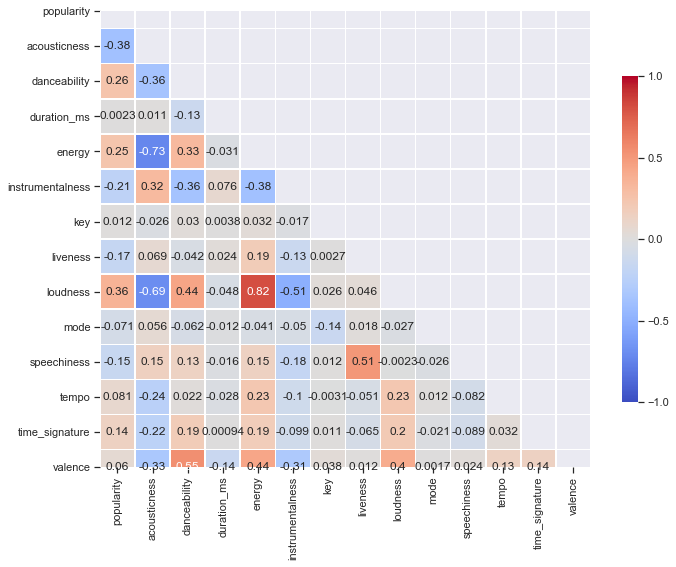

In [177]:
corr_heatmap(data)

As we can see, the `energy` are highly correlated with `loudness` and `accousticness`. So, let's drop `loudness` and `accousticness`. Further action will determined later. 


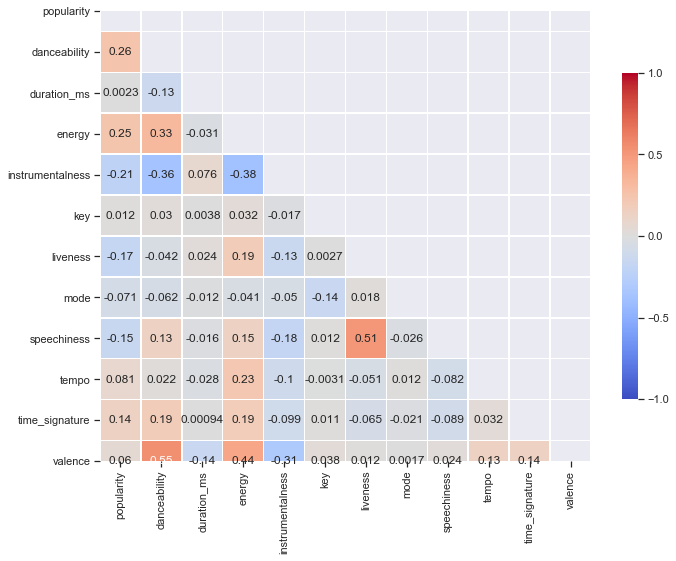

In [178]:
corr_heatmap(data.drop(columns=['acousticness', 'loudness']))

In [165]:
from sklearn.model_selection import train_test_split

In [179]:
X = data.drop(columns=['popularity','acousticness', 'loudness'])
y = data['popularity']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)

In [180]:
print(f"""
Training size: x= {X_train.shape}\t y={y_train.shape}
Validation size: x= {X_valid.shape}\t y={y_valid.shape}
""")


Training size: x= (186180, 11)	 y=(186180,)
Validation size: x= (46545, 11)	 y=(46545,)



# Modelling

## Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression

In [182]:
slr = LinearRegression() # Simple Lnear Regressor

In [183]:
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluation

In [184]:
import numpy as np

In [185]:
y_valid_pred = slr.predict(X_valid)

In [186]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, mean_absolute_errors

In [187]:
error = y_valid_pred-y_valid

In [188]:
error_mae = np.mean(abs(error))
print(f"""{error_mae}
{MAE(y_valid, y_valid_pred)}
""")

13.004876959864216
13.004876959864113



In [189]:
validation = X_valid
validation['error'] = error 
validation['popularity'] = y_valid
validation['^popularity'] = y_valid_pred
validation.head()

C:\Users\dzul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dzul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dzul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,error,popularity,^popularity
99775,0.542,243147,0.962,0.133000,1,0.0438,1,0.1450,170.041,4,0.641,-3.727734,50,46.272266
190477,0.334,205600,0.862,0.000010,1,0.1220,1,0.0374,87.294,4,0.575,16.517087,25,41.517087
22824,0.607,200000,0.912,0.008350,6,0.1570,0,0.1310,150.051,4,0.172,4.317646,52,56.317646
16050,0.707,203000,0.923,0.000437,12,0.2730,1,0.0521,108.049,4,0.842,-18.281319,64,45.718681
18184,0.767,174067,0.683,0.000000,1,0.0808,1,0.0816,120.033,4,0.698,-14.590201,62,47.409799


In [190]:
coeff_df = pd.DataFrame(slr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
danceability,25.635603
duration_ms,0.000003
energy,17.270178
instrumentalness,-8.338133
key,-0.011891
liveness,-11.887502
mode,-1.947294
speechiness,-16.814571
tempo,0.007906
time_signature,1.627994


## Assumption Check
In order to check the assumption of linearity and normality, we can use residual plot. 

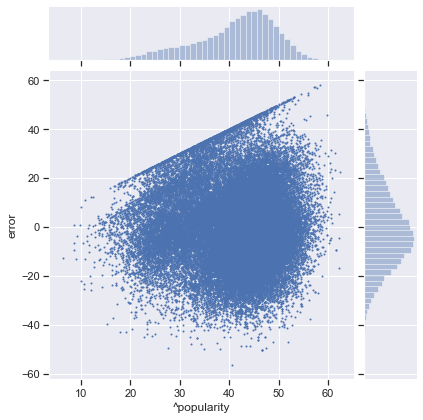

In [191]:
sns.jointplot(x = '^popularity', y = 'error', data = validation, s=1)

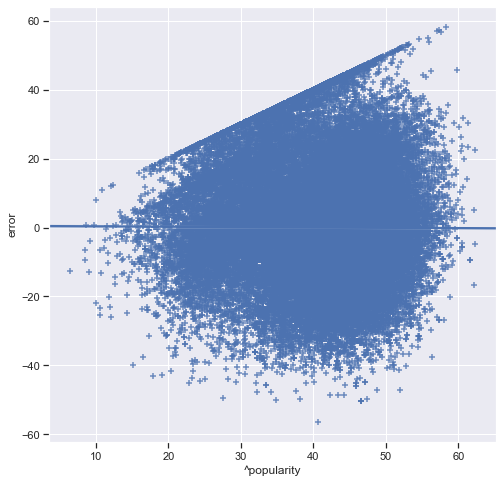

In [192]:
plt.figure(figsize=(8,8))
sns.regplot(x=validation['^popularity'],y=validation['error'], marker='+')

Based on resitual plot above, there's no clear pattern between error/residual to predicted popularit values. This means our model's residual passed the **linearity assumption**. Besides, we see that that residual are tended to form a normal distributions. If it's not enough from the plot above, let's use Saphiro or Kolmogorov Smirnov test. 

In [193]:
from scipy import stats
saphiro = stats.shapiro(validation['error'].values)
ks = stats.kstest(validation['error'].values, 'norm')
print(f"""Saphiro: {saphiro} \nkolmogorov smirnov: {ks}""")

Saphiro: (0.9901522994041443, 0.0) 
kolmogorov smirnov: KstestResult(statistic=0.4705611711219299, pvalue=0.0)


C:\Users\dzul\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because the data is more than 5000, and saphiro is not designed to test data with that number, just focus on the KS test. Look at the p-value, it's so small that the test score is rounded into 0.0. This indicate our model to pass the **normality assumption**

If we see the varianve of the residual

In [229]:
from statsmodels.stats.diagnostic import het_breuschpagan
_df = X_valid.drop(columns=['error', 'popularity', '^popularity']) #This line will drop non-numeric cols
bp_test = het_breuschpagan(error, _df.values )

In [240]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 16777.91601893375, 'LM-Test p-value': 0.0, 'F-Statistic': 2384.401705776956, 'F-Test p-value': 0.0}


based on the p-value < 0.05, our model is heteroscedastic. Hence it fail to pass the **heteroscadicity assumption**.

Collinearity is a condition where two feature or variable are highly correlated. We already inspect this by using `corr_matrix` on section 1. Multicollinearity, on the other hand, is not that simple because it measure multiple features. To calculate multicollinearity, we can use Variance Inflation Factor (VIF). 

[source](https://etav.github.io/python/vif_factor_python.html)

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(_df.values, i) for i in range(_df.shape[1])]
vif["features"] = _df.columns
vif

,VIF Factor,features
0,15.371178,danceability
1,4.811797,duration_ms
2,8.437255,energy
3,1.507299,instrumentalness
4,3.980264,key
5,3.058891,liveness
6,2.854066,mode
7,2.044185,speechiness
8,14.388362,tempo
9,31.263870,time_signature


By theory, if VIF  exceed the value of 10, then multicollinearity is highly present in our predictor. Based on the result, the model didn't pass the **multicollinearity assumption**. The `time_signatur`, `danceability`, `tempo` might be removed in order to make better prediction